In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("Event_Data.csv")

In [3]:
df.head(50)

,Event_ID,Event_Name,Organizer Name,Description,Venue,Date,Time,Attendance,Feedback_Score
0,1,Criminal Crew Dance,CRIMINAL,"Lorem ipsum dolor sit amet, consectetuer adipi...",Main Ground,8/2/2022,9:12 PM,606,5
1,2,SI Crew Dance,SI,Vestibulum ac est lacinia nisi venenatis trist...,ECE Building,3/8/2022,8:26 PM,353,2
2,3,Paryash,TTA,Fusce consequat. Nulla nisl. Nunc nisl.\n\nDui...,MBH Ground,11/30/2022,6:33 PM,362,5
3,4,Team Culture Affairs,SI,Pellentesque at nulla. Suspendisse potenti. Cr...,CSH,5/17/2022,7:15 PM,511,5
4,5,Umang,ZEAL,"Sed sagittis. Nam congue, risus semper porta v...",IT Building,7/19/2023,11:00 AM,590,4
5,6,SI Crew Dance,TCA,In hac habitasse platea dictumst. Morbi vestib...,Cricket Ground,8/28/2022,2:26 PM,325,4
6,7,BGMI,TTA,In hac habitasse platea dictumst. Morbi vestib...,OAT,3/7/2022,9:48 PM,259,5
7,8,SI Crew Dance,CRIMINAL,Proin interdum mauris non ligula pellentesque ...,MBH Ground,10/7/2023,9:00 PM,246,2
8,9,Criminal Crew Dance,SI,Nullam porttitor lacus at turpis. Donec posuer...,BH Ground,4/26/2022,1:04 PM,429,3
9,10,Team Culture Affairs,CRIMINAL,Aenean lectus. Pellentesque eget nunc. Donec q...,OAT,10/30/2022,9:27 AM,563,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Event_ID        1000 non-null   int64 
 1   Event_Name      1000 non-null   object
 2   Organizer Name  1000 non-null   object
 3   Description     1000 non-null   object
 4   Venue           1000 non-null   object
 5   Date            1000 non-null   object
 6   Time            1000 non-null   object
 7   Attendance      1000 non-null   int64 
 8   Feedback_Score  1000 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


In [5]:
df_tmp=df.copy()

In [6]:
df_tmp.head()

,Event_ID,Event_Name,Organizer Name,Description,Venue,Date,Time,Attendance,Feedback_Score
0,1,Criminal Crew Dance,CRIMINAL,"Lorem ipsum dolor sit amet, consectetuer adipi...",Main Ground,8/2/2022,9:12 PM,606,5
1,2,SI Crew Dance,SI,Vestibulum ac est lacinia nisi venenatis trist...,ECE Building,3/8/2022,8:26 PM,353,2
2,3,Paryash,TTA,Fusce consequat. Nulla nisl. Nunc nisl.\n\nDui...,MBH Ground,11/30/2022,6:33 PM,362,5
3,4,Team Culture Affairs,SI,Pellentesque at nulla. Suspendisse potenti. Cr...,CSH,5/17/2022,7:15 PM,511,5
4,5,Umang,ZEAL,"Sed sagittis. Nam congue, risus semper porta v...",IT Building,7/19/2023,11:00 AM,590,4


In [7]:
print(df_tmp['Date'].dtype)

object


In [8]:
df_tmp['Date'] = pd.to_datetime(df_tmp['Date'])

In [9]:
# Add datetime parameters for Eventdate
df_tmp["EventYear"] = df_tmp.Date.dt.year
df_tmp["EventMonth"] = df_tmp.Date.dt.month
df_tmp["EventDay"] = df_tmp.Date.dt.day

In [10]:
# Check for missing categories and different datatypes
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Event_ID        1000 non-null   int64         
 1   Event_Name      1000 non-null   object        
 2   Organizer Name  1000 non-null   object        
 3   Description     1000 non-null   object        
 4   Venue           1000 non-null   object        
 5   Date            1000 non-null   datetime64[ns]
 6   Time            1000 non-null   object        
 7   Attendance      1000 non-null   int64         
 8   Feedback_Score  1000 non-null   int64         
 9   EventYear       1000 non-null   int64         
 10  EventMonth      1000 non-null   int64         
 11  EventDay        1000 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 93.9+ KB


In [11]:
# Check for missing values
df_tmp.isna().sum()

Event_ID          0
Event_Name        0
Organizer Name    0
Description       0
Venue             0
Date              0
Time              0
Attendance        0
Feedback_Score    0
EventYear         0
EventMonth        0
EventDay          0
dtype: int64

In [12]:
import pandas as pd
# This will turn all of the string values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [13]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Event_ID        1000 non-null   int64         
 1   Event_Name      1000 non-null   category      
 2   Organizer Name  1000 non-null   category      
 3   Description     1000 non-null   category      
 4   Venue           1000 non-null   category      
 5   Date            1000 non-null   datetime64[ns]
 6   Time            1000 non-null   category      
 7   Attendance      1000 non-null   int64         
 8   Feedback_Score  1000 non-null   int64         
 9   EventYear       1000 non-null   int64         
 10  EventMonth      1000 non-null   int64         
 11  EventDay        1000 non-null   int64         
dtypes: category(5), datetime64[ns](1), int64(6)
memory usage: 88.6 KB


In [14]:
df_tmp.isnull().sum()/len(df_tmp)

Event_ID          0.0
Event_Name        0.0
Organizer Name    0.0
Description       0.0
Venue             0.0
Date              0.0
Time              0.0
Attendance        0.0
Feedback_Score    0.0
EventYear         0.0
EventMonth        0.0
EventDay          0.0
dtype: float64

In [15]:
# From above obseravation we see there is no missing data

In [16]:
df_tmp.sort_values(by=["EventYear","EventMonth","EventDay"], inplace=True, ascending=True)

# Save preprocessed data
df_tmp.to_csv("train_tmp.csv",
              index=False)

In [17]:
# Import preprocessed data
df_tmp = pd.read_csv("train_tmp.csv",
                     low_memory=False)
df_tmp.head()

,Event_ID,Event_Name,Organizer Name,Description,Venue,Date,Time,Attendance,Feedback_Score,EventYear,EventMonth,EventDay
0,211,Criminal Crew Dance,ZEAL,Maecenas ut massa quis augue luctus tincidunt....,IT Building,2022-02-20,11:12 AM,395,5,2022,2,20
1,12,Umang,TCA,Nullam sit amet turpis elementum ligula vehicu...,Snacker,2022-02-23,11:10 PM,539,4,2022,2,23
2,403,Team Culture Affairs,TTA,"Vestibulum quam sapien, varius ut, blandit non...",BH Ground,2022-02-23,11:01 AM,232,3,2022,2,23
3,482,Paryash,TTA,"Vestibulum quam sapien, varius ut, blandit non...",IT Building,2022-02-23,11:23 AM,761,3,2022,2,23
4,31,SI Crew Dance,TCA,"Nam ultrices, libero non mattis pulvinar, null...",Main Ground,2022-02-24,8:54 PM,522,2,2022,2,24


### Turn categorical variables into numbers
 

In [18]:
for label, content in df_tmp.items(): 
    # Check columns which aren't numeric
    if not pd.api.types.is_numeric_dtype(content): 
        # We add the +1 because pandas encodes missing categories as -1 
        df_tmp[label] = pd.Categorical(content).codes+1 

In [19]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Event_ID        1000 non-null   int64
 1   Event_Name      1000 non-null   int8 
 2   Organizer Name  1000 non-null   int8 
 3   Description     1000 non-null   int16
 4   Venue           1000 non-null   int8 
 5   Date            1000 non-null   int16
 6   Time            1000 non-null   int16
 7   Attendance      1000 non-null   int64
 8   Feedback_Score  1000 non-null   int64
 9   EventYear       1000 non-null   int64
 10  EventMonth      1000 non-null   int64
 11  EventDay        1000 non-null   int64
dtypes: int16(3), int64(6), int8(3)
memory usage: 55.8 KB


In [20]:
df_tmp.isna().sum()

Event_ID          0
Event_Name        0
Organizer Name    0
Description       0
Venue             0
Date              0
Time              0
Attendance        0
Feedback_Score    0
EventYear         0
EventMonth        0
EventDay          0
dtype: int64

In [21]:
df_tmp.head()

,Event_ID,Event_Name,Organizer Name,Description,Venue,Date,Time,Attendance,Feedback_Score,EventYear,EventMonth,EventDay
0,211,2,6,82,5,1,95,395,5,2022,2,20
1,12,7,4,101,9,2,93,539,4,2022,2,23
2,403,5,5,146,1,2,80,232,3,2022,2,23
3,482,3,5,147,5,2,110,761,3,2022,2,23
4,31,4,4,93,7,3,506,522,2,2022,2,24


In [62]:
# Function to determine feedback prediction based on Feedback_Score
def predict_feedback(feedback_score):
    if feedback_score >= 3:
        return 1
    else:
        return 0

# Add new column 'feedback_pred' based on 'Feedback_Score'
df_tmp['feedback_pred'] = df_tmp['Feedback_Score'].apply(predict_feedback)

In [63]:
df_tmp.head()

,Event_ID,Event_Name,Organizer Name,Description,Venue,Date,Time,Attendance,Feedback_Score,EventYear,EventMonth,EventDay,feedback_pred
0,211,2,6,82,5,1,95,395,5,2022,2,20,1
1,12,7,4,101,9,2,93,539,4,2022,2,23,1
2,403,5,5,146,1,2,80,232,3,2022,2,23,1
3,482,3,5,147,5,2,110,761,3,2022,2,23,1
4,31,4,4,93,7,3,506,522,2,2022,2,24,0


In [66]:
# Everything except target variable
X = df_tmp.drop(["Feedback_Score", "Event_ID", "Event_Name", "Description", "Venue", "Date", "Time", "Attendance","feedback_pred"], axis=1)

# Target variable
y = df_tmp.feedback_pred.values

In [67]:
X

,Organizer Name,EventYear,EventMonth,EventDay
0,6,2022,2,20
1,4,2022,2,23
2,5,2022,2,23
3,5,2022,2,23
4,4,2022,2,24
...,...,...,...,...
995,2,2024,1,18
996,3,2024,1,18
997,6,2024,1,20
998,3,2024,1,21


In [68]:
# Random seed for reproducibility
import numpy as np
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [69]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1)


# Fit the model
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


CPU times: total: 46.9 ms
Wall time: 323 ms


In [70]:
## Models
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [72]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [73]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [74]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.725, 'Logistic Regression': 0.765, 'Random Forest': 0.705}

In [77]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 76.50%


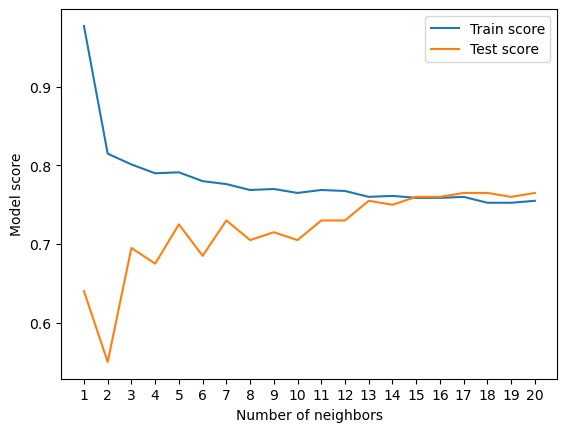

In [78]:
import matplotlib.pyplot as plt
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [85]:
# Initialize KNN classifier with best n_neighbors
models = KNeighborsClassifier(n_neighbors=20)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on new data (e.g., X_test)
y_pred = best_knn.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.765

In [87]:
from joblib import dump

In [88]:
dump(model,'./../saveModel/model.joblib')

['./../saveModel/model.joblib']